## Code to build some graphs out of the OSS Data

### Data from repo-list.csv

In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import re
from wordcloud import WordCloud
from functools import lru_cache

In [99]:
data = pd.read_csv('./mongodb_csv_dump/repo-list.csv')

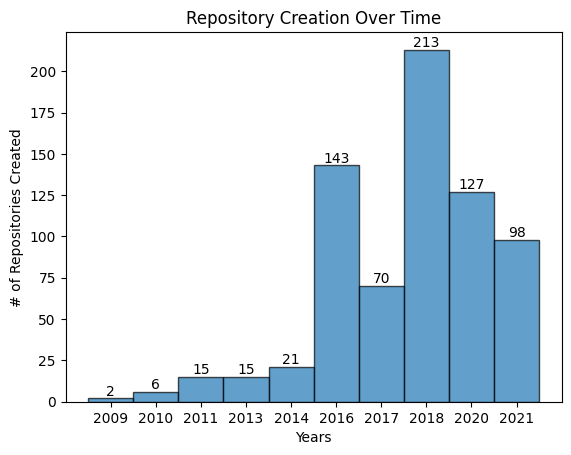

In [100]:
# number of repo.'s created over the years
data_by_year = data.sort_values(by='created_at', ascending=True)
Years_create = data_by_year['created_at'].str.extract(r'(\d{4})')

n, bins, patches = plt.hist(Years_create, bins=10, edgecolor='black', alpha=0.7)
plt.title('Repository Creation Over Time')
plt.xlabel('Years')
plt.ylabel('# of Repositories Created')

# Set x-axis tick positions to the midpoint of each bar
midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
plt.xticks(midpoints)

for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

plt.show()

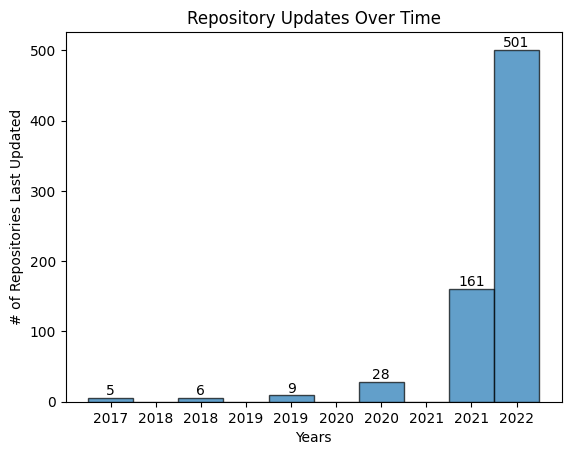

In [101]:
# When the last update was according to the data 
data_by_year = data.sort_values(by='updated_at', ascending=True)
Years_update = data_by_year['updated_at'].str.extract(r'(\d{4})')

n, bins, patches = plt.hist(Years_update, bins=10, edgecolor='black', alpha=0.7)
plt.title('Repository Updates Over Time')
plt.xlabel('Years')
plt.ylabel('# of Repositories Last Updated')

# Set x-axis tick positions to the midpoint of each bar
midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
plt.xticks(midpoints)

for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')
        
plt.show()

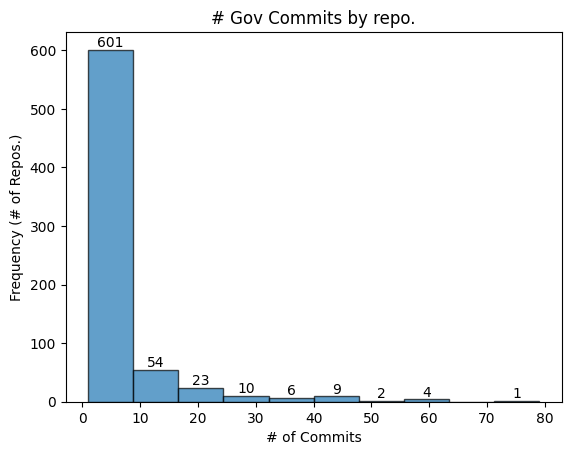

In [102]:
# W
n, bins, patches = plt.hist(data['num_gov_commits'], bins=10, edgecolor='black', alpha=0.7)
plt.title('# Gov Commits by repo.')
plt.xlabel('# of Commits')
plt.ylabel('Frequency (# of Repos.)')

# midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
# plt.xticks(midpoints)

# Add labels to the bars
for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

plt.show()

### Data from governance-change-commit.csv

In [103]:
data_gov = pd.read_csv('./mongodb_csv_dump/governance-change-commit.csv')

In [104]:
commit_counts = data_gov.groupby('repository.nameWithOwner').size().reset_index(name='Commit_Count')
print(commit_counts)

                          repository.nameWithOwner  Commit_Count
0                    AI-CAMEL/Skills-Specification             2
1                         ARM-software/vktrace-arm             2
2            AcademySoftwareFoundation/OpenColorIO            10
3    AcademySoftwareFoundation/OpenShadingLanguage             6
4    AcademySoftwareFoundation/aswf-sample-project             1
..                                             ...           ...
705                                  yarnpkg/berry             1
706                                      yfii/docs             2
707                     zarr-developers/governance            21
708                              zellij-org/zellij             9
709                   zhenhaitapei/zhap_metrics_ui             8

[710 rows x 2 columns]


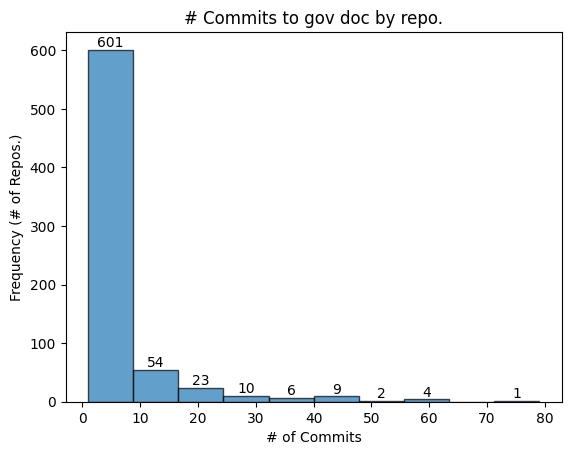

In [105]:
n, bins, patches = plt.hist(commit_counts['Commit_Count'], bins=10, edgecolor='black', alpha=0.7)
plt.title('# Commits to gov doc by repo.')
plt.xlabel('# of Commits')
plt.ylabel('Frequency (# of Repos.)')

# Add labels to the bars
for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

### Build a CSV list of all URLS found

In [106]:
collections_status = pd.read_csv('./mongodb_csv_dump/collection-status.csv')
commit_list = pd.read_csv('./mongodb_csv_dump/commit-list.csv')
governance_change_commit_by_section = pd.read_csv('./mongodb_csv_dump/governance-change-commit-by-section.csv')
governance_change_commit = pd.read_csv('./mongodb_csv_dump/governance-change-commit.csv')
issue_list = pd.read_csv('./mongodb_csv_dump/issue-list.csv')
latest_governance_file_content_by_section = pd.read_csv('./mongodb_csv_dump/latest-governance-file-content-by-section.csv')
latest_governance_file_content = pd.read_csv('./mongodb_csv_dump/latest-governance-file-content.csv')
repo_list = pd.read_csv('./mongodb_csv_dump/repo-list.csv')

/var/folders/52/s8jxyj5n0wz6vrg4m1jw41mh0000gn/T/ipykernel_5897/1469719581.py:5: DtypeWarning: Columns (5,6,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  issue_list = pd.read_csv('./mongodb_csv_dump/issue-list.csv')


In [107]:

df_list = [collections_status, commit_list, governance_change_commit_by_section, governance_change_commit, issue_list, latest_governance_file_content_by_section, latest_governance_file_content, repo_list]


# Create an empty list to store unique URLs
unique_urls = []

# Iterate through each DataFrame in the list

for df in df_list:
    for column in df.columns:
        # Extract URLs from the text within each cell
        url_pattern = r'(https?://\S+)'
        urls_in_df = df[column].apply(lambda x: re.findall(url_pattern, str(x)))
        
        # Append the URLs to the list
        unique_urls.extend(urls_in_df)

# Flatten the list of URLs and remove duplicates
unique_urls = list(set(url for sublist in unique_urls for url in sublist))

# Create a new DataFrame with unique URLs
unique_urls_df = pd.DataFrame({'URLs': unique_urls})

# Reset the index of the new DataFrame
unique_urls_df.reset_index(drop=True, inplace=True)

print(unique_urls_df)

                                                      URLs
0        https://github.com/libuv/ci-tmp-libuv-node/com...
1        https://github.com/InsightSoftwareConsortium/I...
2        https://github.com/OpenRefine/OpenRefine/issue...
3        https://github.com/OpenRefine/OpenRefine/commi...
4        https://github.com/grpc/grpc/commit/be75ffd028...
...                                                    ...
3648876  https://github.com/gatsbyjs/gatsby/issues/3896...
3648877  https://github.com/globaleaks/GlobaLeaks/issue...
3648878  https://github.com/vespa-engine/vespa/commit/6...
3648879  https://github.com/nodejs/ffi/commit/89d211f54...
3648880          https://github.com/nodejs/node/pull/39631

[3648881 rows x 1 columns]


### Number of words in the newsest/oldest commit of each Gov file

In [108]:
# Getting into contents, produce two histograms, showing the number of words in the oldest and newest versions of each gov.md file

def count_words(cell_content):
    words = str(cell_content).split()
    return len(words)

# Filter the rows with the specific date and the contents on the earliest and latest dates

earliest_commits = governance_change_commit.groupby('repository.nameWithOwner')['committedDate'].min()
latest_commits = governance_change_commit.groupby('repository.nameWithOwner')['committedDate'].max()

earliest_latest_df = pd.DataFrame({
    'Repository': earliest_commits.index,
    'EarliestCommit': earliest_commits.values,
    'LatestCommit': latest_commits.values
})

data_e = latest_governance_file_content[latest_governance_file_content['committedDate'].isin(earliest_latest_df['EarliestCommit'])]
data_l = latest_governance_file_content[latest_governance_file_content['committedDate'].isin(earliest_latest_df['LatestCommit'])]

earliest_latest_content_df = pd.DataFrame({
    'Repository': earliest_commits.index,
    'EarliestContent' : data_e['content'],
    'LatestContent' : data_l['content']
})

earliest_latest_content_df['EarliestWordCount'] = earliest_latest_content_df['EarliestContent'].apply(lambda x: count_words(x))
earliest_latest_content_df['LatestWordCount'] = earliest_latest_content_df['LatestContent'].apply(lambda x: count_words(x))


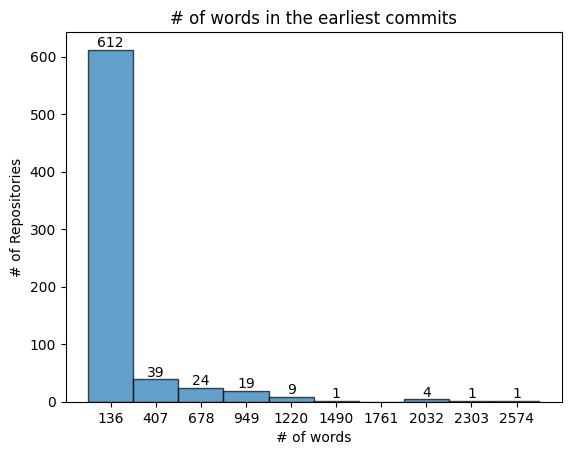

In [109]:
# graph the data

n, bins, patches = plt.hist(earliest_latest_content_df['EarliestWordCount'], bins=10, edgecolor='black', alpha=0.7)
plt.title('# of words in the earliest commits')
plt.xlabel('# of words')
plt.ylabel('# of Repositories')

# Set x-axis tick positions to the midpoint of each bar
midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
plt.xticks(midpoints)

for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')
        
plt.show()

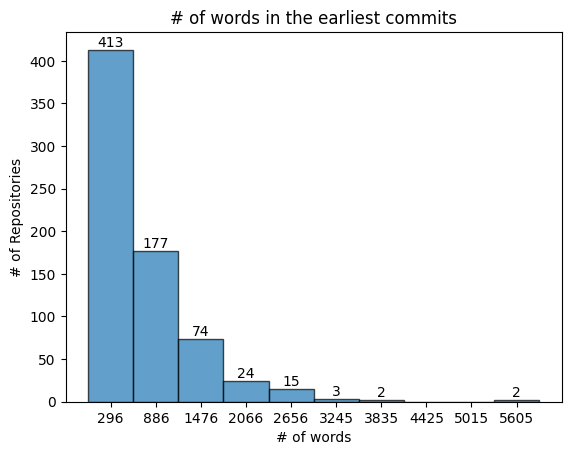

In [110]:
# graph the data

n, bins, patches = plt.hist(earliest_latest_content_df['LatestWordCount'], bins=10, edgecolor='black', alpha=0.7)
plt.title('# of words in the earliest commits')
plt.xlabel('# of words')
plt.ylabel('# of Repositories')

# Set x-axis tick positions to the midpoint of each bar
midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
plt.xticks(midpoints)

for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')
        
plt.show()

### Produce Word Clouds

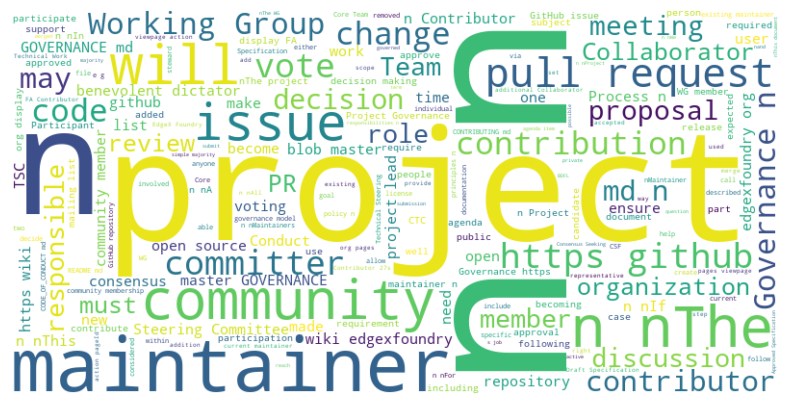

In [115]:
text = ' '.join(earliest_latest_content_df['EarliestContent'].dropna())
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400,
    max_words=200,  # Adjust this value as needed
    colormap='viridis',  # You can choose a different color map
    contour_color='black',  # Outline color
    contour_width=1  # Outline width
)
wordcloud.generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

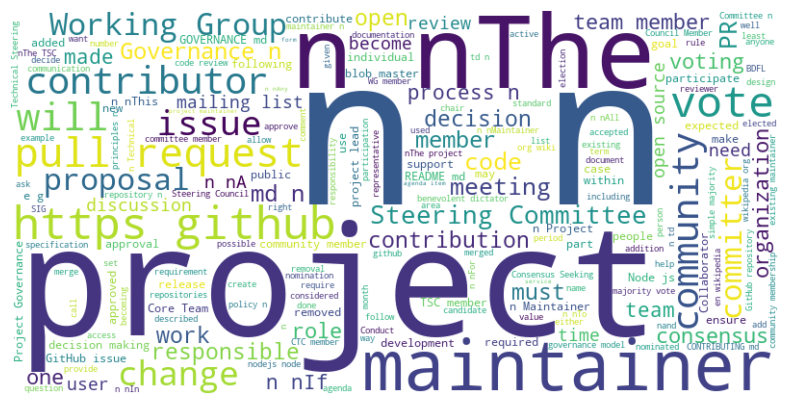

In [116]:
text = ' '.join(earliest_latest_content_df['LatestContent'].dropna())
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400,
    max_words=200,  # Adjust this value as needed
    colormap='viridis',  # You can choose a different color map
    contour_color='black',  # Outline color
    contour_width=1  # Outline width
)
wordcloud.generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()